# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.tail()

,grupo_de_edad,fecha,fallecidos
1661,50-59,2020-12-02,1547
1662,60-69,2020-12-02,3258
1663,70-79,2020-12-02,4339
1664,80-89,2020-12-02,3991
1665,>=90,2020-12-02,1434


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

In [7]:
bars = alt.Chart(fallecidos_etareo).mark_bar().encode(
    x = alt.X('grupo_de_edad',title = 'Grupo de edad'),
    y = alt.Y('max(fallecidos)', title = 'Número de Fallecidos'), 
    #dx = 3
).properties(
    title = 'Fallecidos por rango etáreo',
    width = 400, 
    height = 400,
    
)

text = bars.mark_text(
        #align='left',
        baseline='middle',
        dy = -4  # Nudges text to right so it doesn't appear on top of the bar
    ).encode(
        text='max(fallecidos)'
    )
(bars + text).properties(height=900)

alt.LayerChart(...)

**Comentarios:** Del gráfico se puede ver que a medida que aumenta la edad, aumenta el número de fallecidos, hasta llegar al grupo de 70-79. En adelante, la cantidad de fallecidos empieza a disminuir pues es menor la población en ese rango etáreo.

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

In [8]:
activos.sort_values(by = ['poblacion'], ascending = True)

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
6563,Magallanes y la Antartica,12,Antartica,12202.0,137.0,2020-06-12,0.0
10369,Magallanes y la Antartica,12,Antartica,12202.0,137.0,2020-07-24,0.0
22825,Magallanes y la Antartica,12,Antartica,12202.0,137.0,2020-11-27,0.0
19019,Magallanes y la Antartica,12,Antartica,12202.0,137.0,2020-10-19,0.0
16943,Magallanes y la Antartica,12,Antartica,12202.0,137.0,2020-09-28,0.0
...,...,...,...,...,...,...,...
6001,Metropolitana,13,Puente Alto,13201.0,645909.0,2020-06-08,1395.0
14651,Metropolitana,13,Puente Alto,13201.0,645909.0,2020-09-07,639.0
3579,Metropolitana,13,Puente Alto,13201.0,645909.0,2020-05-15,802.0
14997,Metropolitana,13,Puente Alto,13201.0,645909.0,2020-09-11,584.0


In [9]:
alt.Chart(activos.sort_values(by = ['poblacion'], ascending = True)).mark_bar().encode(
    x = 'poblacion',
    y = 'comuna'
)

alt.Chart(...)

**Comentarios:** Si bien no es el mejor gráfico, nos permite ver que varía mucho la población entre las comunas, habiendo algunas (pocas) con muchos habitantes y otras con muy pocos.

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

In [10]:
(alt.Chart(fallecidos_etareo).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('sum(fallecidos)', title = 'Fallecidos'),
    #color = 'grupo_de_edad'
)+
alt.Chart(fallecidos_etareo).mark_line().encode(
    x = 'fecha',
    y = 'fallecidos', 
    color = alt.Color('grupo_de_edad', title = 'Grupo de edad')
)).properties(
    title = 'Número acumulado de fallecidos a la fecha, separados por rango etáreo'
)

alt.LayerChart(...)

**Comentarios:** Como es esperable, se muere más gente de mayor edad, lo curioso es que las curvas son bastante parecidas, presentando quizá la edad como un factor que escala la curva.

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

In [1]:
alt.Chart(confirmados).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('sum(casos_confirmados)', title = 'Casos confirmados')
).properties(
    title = 'Evolución de casos confirmados en el tiempo'
)&alt.Chart(fallecidos).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('sum(fallecidos)', title = 'Fallecidos')
).properties(
    title = 'Evolución de fallecimientos a través del tiempo'
)&alt.Chart(activos).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('sum(casos_activos)', title = 'Casos activos')
).properties(
    title = 'Evolución de los casos activos por día a través del tiempo'
)

NameError: name 'alt' is not defined

**Comentarios:** Se ve que hay una correlación entre la cantidad de casos confirmados y los fallecimientos. Si bien no se ve una relación con los casos activos, esto puede ser porque los otros dos son acumulados y los casos activos no.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [12]:
alt.Chart(confirmados).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('mean(tasa)', title = 'Tasa de incidencia'),
    color = alt.Color('region', title = 'Región')
).properties(
    title = 'Tasa de incidencia a través del tiempo por regiones'
)

alt.Chart(...)

**Comentarios:** Las regiones más australes parecen tener una mayor evolución en la tasa de incidencia, esto puede deberse a que los climas son más extremos o que no se hayan tomado las mismas medidas que en la capital.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [13]:
alt.Chart(confirmados.loc[lambda x: (x['fecha'] == '2020-4-13') | (x['fecha'] == '2020-11-6')]).mark_circle().encode(
    x = alt.X('casos_confirmados', title = 'Casos confirmados'),
    y = alt.Y('tasa', title = 'Tasa de incidencia'),
    color = alt.Color('region', title = 'Región')
).properties(
    title = 'Casos confirmados versus tasa de incidencia'
)

alt.Chart(...)

**Comentarios:** Pareciera haber una correlación lineal, pero habría que calcular los coeficientes respectivos para tener una mejor conclusión.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

In [14]:
graf = alt.Chart(activos).mark_line().encode(
    x = alt.X('fecha', title = 'Fecha'),
    y = alt.Y('casos_activos', title = 'Casos activos'),
    color = alt.Color('comuna', title = 'Comuna')
).properties(
    title = 'Evolución de los casos activos a través del tiempo por comuna'
)
for region in activos['region'].unique():
    graf &= (alt.Chart(activos.loc[lambda x: x['region'] == region]).mark_line().encode(
        x = alt.X('fecha', title = 'Fecha'),
        y = alt.Y('casos_activos', title = 'Casos activos'),
        color = alt.Color('comuna', title = 'Fecha')
    ).properties(
        title = 'Evolución de los casos activos en las comunas de la región de '+ region
    ))
graf

alt.VConcatChart(...)

**Comentarios:** Tener a todas las comunas en un solo gráfico nos permite comparar comunas aunque estén en distintas regiones y, por ejemplo, saber qué comuna tiene mayor cantidad de casos activos. Sin embargo, al haber tantas comunas, se confunden al estar en un solo gráfico. 

Por otro lado, si hacemos los gráficos por regiones, nos permite observar mejor el comportamiento de cada comuna, ya que disminuímos considerablemente el número de comunas en el gráfico. Sin embargo, podemos comparar solo localmente (dentro de una misma región), y se nos dificulta el comparar comunas que se encuentran en regiones distintas

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [43]:
region_names = {
    "Araucanía": "La Araucanía",
    "La Araucania" : "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Aysen": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Valparaiso" : "Valparaíso",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
    "Del Libertador General Bernardo O’Higgins" : "Libertador General Bernardo O'Higgins",
    "Nuble" : "Ñuble",
    "Biobio" : "Biobío",
    "Los Rios" : "Los Ríos",
    "Magallanes y la Antartica" : "Magallanes y de la Antártica Chilena",
    "Tarapaca" : "Tarapacá"
}

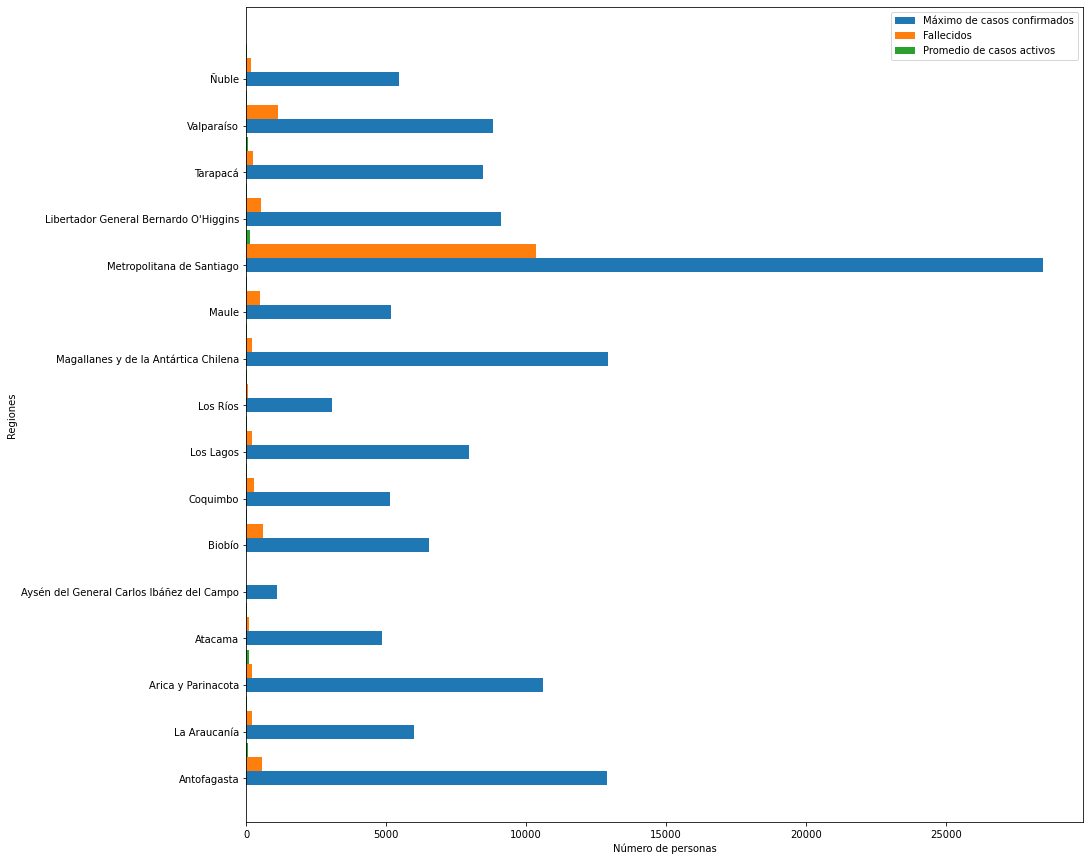

In [44]:
import seaborn as sns
fallecidos_mod = fallecidos.groupby(['region']).agg({'fallecidos' : 'max'}).reset_index()
activos_mod = activos.groupby(['region']).agg({'casos_activos' : 'mean'}).reset_index()
confirmados_mod = confirmados.groupby(['region']).agg({'casos_confirmados' : 'max'}).reset_index()

fallecidos_mod['region'] = fallecidos_mod['region'].replace(region_names)
activos_mod['region'] = activos_mod['region'].replace(region_names)
confirmados_mod['region'] = confirmados_mod['region'].replace(region_names)
df = pd.merge(fallecidos_mod, activos_mod, how = 'inner', on = ['region']).merge(confirmados_mod, how = 'inner', on = ['region'])
#df

plt.figure(figsize = (15, 15))

w = 0.3

x = list(df['region'])
cc = list(df['casos_confirmados'])
ca = list(df['casos_activos'])
fa = list(df['fallecidos'])

bars1 = np.arange(len(x))
bars2 = [w + i for i in bars1]
bars3 = [i + w for i in bars2]

plt.barh(x, cc, w, label = 'Máximo de casos confirmados')
plt.barh(bars2, fa, w, label = 'Fallecidos')
plt.barh(bars3, ca, w, label = 'Promedio de casos activos')
plt.xlabel('Número de personas')
plt.ylabel('Regiones')
plt.xticks()
plt.legend()

**Comentarios:** Se ve una clara relación entre el máximo de casos confirmados con el número de fallecidos.

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto utilizaremos haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [45]:
import geopandas as gpd
from pathlib import Path

In [46]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [47]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [20]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [48]:
fallecidos_mod2 = fallecidos.groupby(['region', 'fecha']).agg({'fallecidos' : 'max'}).reset_index()
activos_mod2 = activos.groupby(['region', 'codigo_region', 'fecha']).agg({'casos_activos' : 'mean', 'poblacion' : 'sum'}).reset_index()
confirmados_mod2 = confirmados.groupby(['region', 'fecha']).agg({'casos_confirmados' : 'max', 'tasa' : 'mean', 'poblacion' : 'sum'}).reset_index()
for reg in region_names:
    fallecidos_mod2['region'] = fallecidos_mod2['region'].replace(reg, region_names[reg])
    activos_mod2['region'] = activos_mod2['region'].replace(reg, region_names[reg])
    confirmados_mod2['region'] = confirmados_mod2['region'].replace(reg, region_names[reg])
df2 = pd.merge(fallecidos_mod2, activos_mod2, how = 'inner', on = ['region', 'fecha']).merge(confirmados_mod2, how = 'inner', on = ['region', 'fecha', 'poblacion'])
geo_reg = regiones.drop(columns=["objectid","cir_sena","area_km","st_area_sh","st_length_"])\
    .rename(columns={"Region":"region","codregion":"codigo_region"})
casos_geo = (pd.merge(df2, geo_reg, how = 'inner', on = ['codigo_region'])).drop(['region_y'], axis = 1).rename(columns = {'region_x' : 'region'})
#geo_reg
casos_geo.head()

,region,fecha,fallecidos,codigo_region,casos_activos,poblacion,casos_confirmados,tasa,geometry
0,Antofagasta,2020-04-13,1.0,2,8.666667,691854.0,106.0,22.475776,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
1,Antofagasta,2020-04-15,1.0,2,9.777778,691854.0,122.0,30.527772,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Antofagasta,2020-04-17,1.0,2,11.444444,691854.0,145.0,40.127710,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
3,Antofagasta,2020-04-20,1.0,2,14.333333,691854.0,184.0,50.656108,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
4,Antofagasta,2020-04-24,2.0,2,19.111111,691854.0,261.0,66.911667,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [37]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [38]:
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.loc[lambda x : x['fecha'] == fecha]
    
    chart = alt.Chart(data).mark_geoshape().encode(
        color = col
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()
    return

Prueba con lo siguiente

In [39]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

alt.Chart(...)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [26]:
import ipywidgets as widgets
from ipywidgets import interactive, interact

In [27]:
col_widget = widgets.Dropdown(options = [('Población', 'poblacion'), ('Casos confirmados', 'casos_confirmados'), ('Tasa', 'tasa'), ('Casos activos', 'casos_activos'), ('Fallecidos', 'fallecidos')], description = 'Columna')

In [28]:
start=pd.to_datetime("2020-11-09")
fecha_widget = widgets.DatePicker(description = 'Fecha', value = start)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

In [40]:
covid_dashboard = interactive(
    covid_chile_chart,
    fecha=fecha_widget,
    col=col_widget
)
covid_dashboard

interactive(children=(DatePicker(value=Timestamp('2020-11-09 00:00:00'), description='Fecha'), Dropdown(descri…

**Comentarios:** Si bien es una muy buena herramienta, es muy lenta para usar.

pd. Perdí la región de Aysén, posiblemente en un merge :c 